In [1]:
import sys
import os

package_path = '..'
if package_path not in sys.path:
    sys.path.append(package_path)

In [2]:
%reload_ext autoreload
%autoreload 2

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from roi_rectangle import RoiRectangle

from src.config.config import load_config

In [4]:
from src.filesystem import get_run_scan_directory

def get_npz_data(root: str, run_n: int, scan_n: int) -> dict[str, np.ndarray]:
    npz_dir: str = get_run_scan_directory(root, run_n, scan_n)
    npz_file = os.path.join(npz_dir, f'run={run_n:04}_scan={scan_n:04}.npz')
    return dict(np.load(npz_file))

In [6]:
config = load_config()
npz_dir = config.path.processed_dir
data = get_npz_data(npz_dir, 147, 1)
images = data['poff']
images.shape

(120, 514, 1030)

C:\Users\isaac\AppData\Local\Temp\ipykernel_20984\108534876.py:6: RuntimeWarning: divide by zero encountered in log
  ax.imshow(np.log(img))


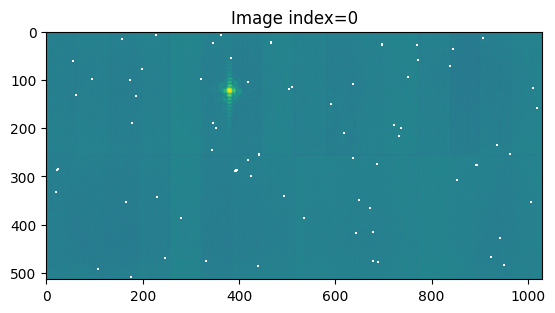

In [53]:
index = 0
img = images.sum(0)

fig, ax = plt.subplots(1, 1)

ax.imshow(np.log(img))
ax.set_title(f"Image index={index}");

C:\Users\isaac\AppData\Local\Temp\ipykernel_20984\2110944275.py:8: RuntimeWarning: divide by zero encountered in log
  ax.imshow(np.log(roi_img))


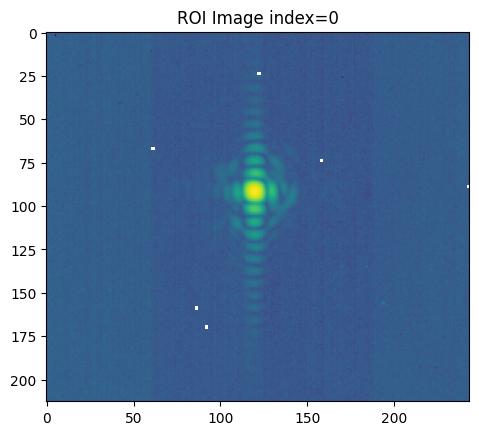

In [78]:
from scipy.ndimage import gaussian_filter

roi_rect: RoiRectangle = RoiRectangle(x1=261, y1=31, x2=505, y2=244)
roi_img = roi_rect.slice(img)
# roi_img = gaussian_filter(roi_img, sigma=0)
fig, ax = plt.subplots(1, 1)

ax.imshow(np.log(roi_img))
ax.set_title(f"ROI Image index={index}");

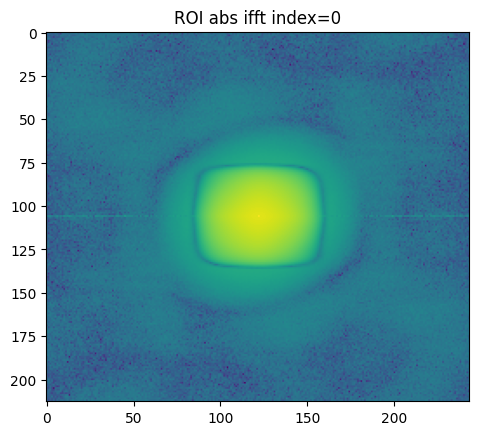

In [76]:
from scipy.fft import ifft2
from numpy.fft import fftshift

fig, ax = plt.subplots(1, 1)

ax.imshow(np.log(np.abs(np.fft.fftshift(ifft2(roi_img)))))
ax.set_title(f"ROI abs ifft index={index}");

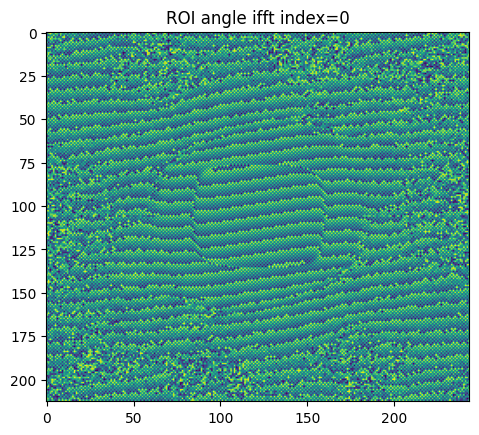

In [77]:
from scipy.fft import ifft2
from numpy.fft import fftshift

fig, ax = plt.subplots(1, 1)

ax.imshow(np.angle(np.fft.fftshift(ifft2(roi_img))))
ax.set_title(f"ROI angle ifft index={index}");